# Аналитика в авиакомпании

**Описание проекта**

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

**Описание данных**

/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
* model — модели самолета
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
* city — городах
* average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

**План работы**

* импортировать файлы;
* изучить данные в них;
* проверить типы данных на корректность;
* выбрать топ-10 городов по количеству рейсов;
* построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
* сделать выводы по каждому из графиков, пояснить результат.

**Содержание**

1. [Общая информация](#start)
2. [Подготовка данных](#preprocessing)
3. [Графики](#plots)
    * [Модели самолетов и количество рейсов](#1)
    * [Города и количество рейсов](#2)
    * [Топ-10 городов и количество рейсов](#3)  
4. [Общие выводы](#conclusion)

## 1. Общая информация <a id="start"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

aircrafts = pd.read_csv('/datasets/query_1.csv')
aircrafts

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [2]:
aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [3]:
cities = pd.read_csv('/datasets/query_3.csv')
cities

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [4]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Все таблицы содержат полные данные (без пропусков), типы данных полей соответствуют их содержимому.  
Среднее количество полетов записано в десятичных дробях, для удобства анализа и расчетов умножим каждое значение на количество дней в августе (31) и будем рассматривать количество полетов в месяц.

### Вывод

Имеются 2 таблицы: **aircrafts** содержит информацию о количестве рейсов для 8 моделей самолетов в сентябре 2018 года;
**cities** включает в себя данные о среднем количестве рейсов за день в августе 2018 года, прибывающих в 101 город России.  
Перед построением графиков в таблице **cities** выведем данные об общем количестве рейсов в августе 2018 года в каждый город и создадим таблицу с топ-10 городов по количеству рейсов.

# 2. Подготовка данных <a id="preprocessing"></a>

Добавим в таблицу **cities** столбец с общим количеством полетов в августе 2018 года в каждый город.

In [5]:
cities['flights_per_month'] = cities['average_flights'] * 31
cities.sort_values('flights_per_month', ascending=False).head()

,city,average_flights,flights_per_month
43,Москва,129.774194,4023.0
70,Санкт-Петербург,31.161290,966.0
54,Новосибирск,17.322581,537.0
33,Красноярск,11.580645,359.0
20,Екатеринбург,11.322581,351.0


In [6]:
cities['flights_per_month'] = cities['flights_per_month'].astype('int')
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
city                 101 non-null object
average_flights      101 non-null float64
flights_per_month    101 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


Создадим таблицу с 10 городами с наибольшим количеством рейсов.

In [7]:
top_10_cities = cities.nlargest(10, keep='all', columns='flights_per_month')
top_10_cities

,city,average_flights,flights_per_month
43,Москва,129.774194,4022
70,Санкт-Петербург,31.161290,966
54,Новосибирск,17.322581,536
33,Красноярск,11.580645,359
20,Екатеринбург,11.322581,351
67,Ростов-на-Дону,10.193548,316
63,Пермь,10.129032,314
10,Брянск,10.000000,310
74,Сочи,9.612903,298
84,Ульяновск,9.580645,297


### Вывод

В таблице **cities** вывели данные об общем количестве рейсов в августе 2018 года в каждый город (**flights_per_month**) и создали таблицу с топ-10 городов по количеству рейсов - **top_10_cities**.

# 3. Графики <a id="plots"></a>

### Модели самолетов и количество рейсов <a id="1"></a>

Отобразим количество рейсов для каждой модели самолетов в сентябре 2018 года на графике boxplot.

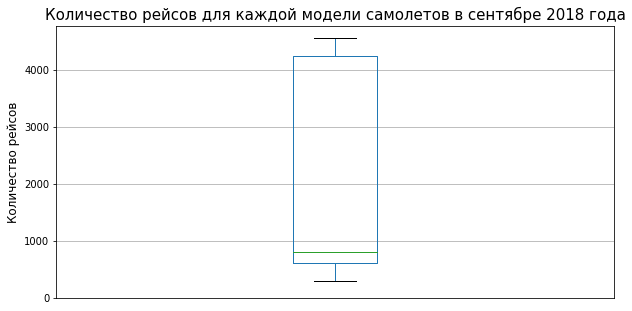

In [8]:
aircrafts.boxplot(column='flights_amount', figsize=(10, 5))
plt.title('Количество рейсов для каждой модели самолетов в сентябре 2018 года', fontsize = 15)
plt.ylim(0)
plt.xticks([])
plt.ylabel('Количество рейсов', fontsize=12)
plt.show()

In [9]:
aircrafts['flights_amount'].describe()

count       8.000000
mean     2035.625000
std      1965.203947
min       300.000000
25%       605.250000
50%       795.000000
75%      4250.250000
max      4557.000000
Name: flights_amount, dtype: float64

Рассмотрим распределение рейсов для каждой модели самолетов на графике.

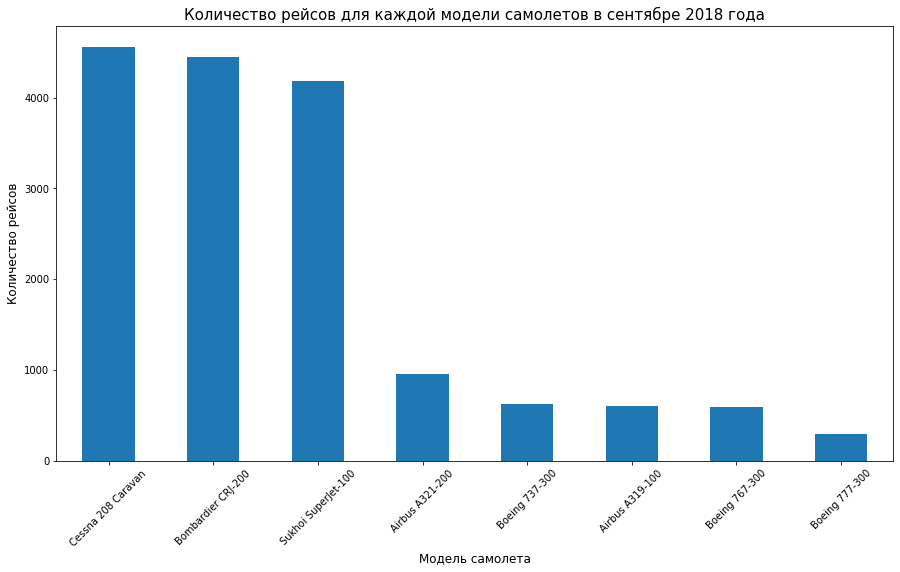

In [10]:
aircrafts.sort_values('flights_amount', ascending=False).plot(x='model', y='flights_amount', kind='bar', figsize=(15, 8), rot=45, legend=False)
plt.title('Количество рейсов для каждой модели самолетов в сентябре 2018 года', fontsize = 15)
plt.ylabel('Количество рейсов', fontsize=12)
plt.xlabel('Модель самолета', fontsize=12)
plt.show()

### Вывод

В сентябре 2018 года самыми востребованными были самолеты моделей Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100: у каждой модели больше 4000 рейсов. Несмотря на то, что количество самолетов всех моделей Airbus и Boeing значительно превышает количество остальных самолетов (информация из таблицы aircrafts из базы данных), количество рейсов для каждой модели не больше 1000, т.е. большая часть самолетов этих моделей не совершила ни одного рейса в сентябре 2018 года.  
В группу моделей с большим количеством рейсов входят самолеты с малой пассажировместимостью, которые используются для полетов на небольшие расстояния. Большое количество рейсов связано с их назначением: коммерческой перевозки пассажиров и грузов, туристических и экскурсионных полетов, перевозки VIP-пассажиров. Большие самолеты всех представленных в F9 моделей Airbus и Boeing скорее всего летают только между крупными городами России, т.к. их невыгодно использовать на небольшие расстояния и на малых пассажиропотоках. Поэтому и количество рейсов для них маленькое.

### Города и количество рейсов <a id="2"></a>

Рассмотрим распределение количества рейсов в города России на графике.

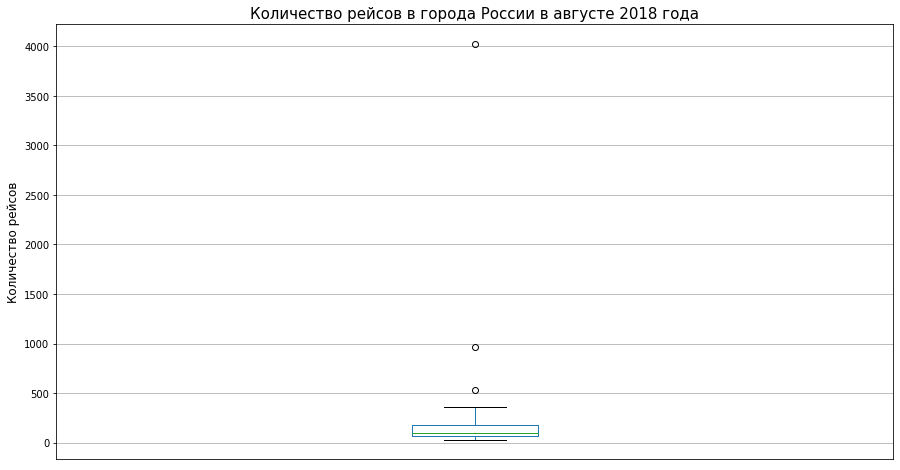

In [11]:
cities.boxplot(column='flights_per_month', figsize=(15, 8))
plt.title('Количество рейсов в города России в августе 2018 года', fontsize = 15)
plt.xticks([])
plt.ylabel('Количество рейсов', fontsize=12)
plt.show()

In [12]:
cities['flights_per_month'].describe()

count     101.000000
mean      170.168317
std       406.624816
min        31.000000
25%        62.000000
50%        93.000000
75%       182.000000
max      4022.000000
Name: flights_per_month, dtype: float64

На графике boxplot 3 выброса - города, в которые пребывает наибольшее количество рейсов.

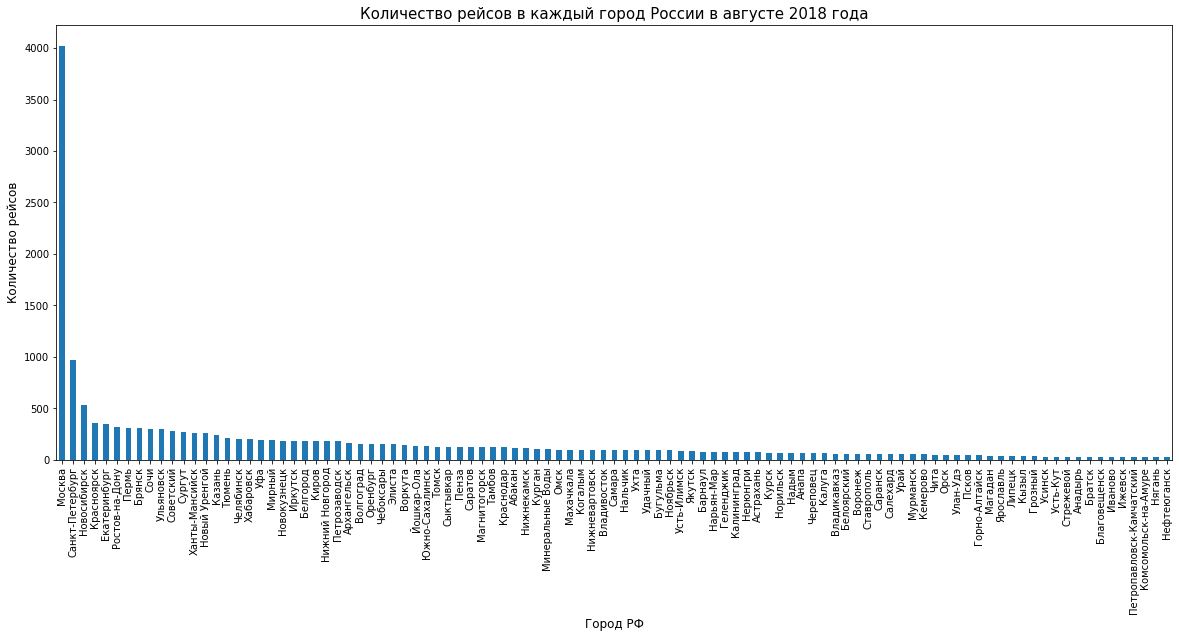

In [13]:
cities.sort_values('flights_per_month', ascending=False).plot(x='city', y='flights_per_month', kind='bar', figsize=(20, 8), rot=90, legend=False)
plt.title('Количество рейсов в каждый город России в августе 2018 года', fontsize = 15)
plt.ylabel('Количество рейсов', fontsize=12)
plt.xlabel('Город РФ', fontsize=12)
plt.show()

### Вывод

Москва - столица, самый крупный город России и самый густонаселенный, поэтому и количество рейсов в этот город самое большое. К тому же в некоторые города России можно долететь только с пересадкой в Москве, также часто маршруты через столицу оказываются дешевле, т.о. пассажиры выбирают перелеты через Москву. Второе и третье место принадлежит Санкт-Петербургу и Новосибирску, которые также занимают соответствующие места по численности населения среди городов России. В половине всех городов количество рейсов в августе 2018 года не превышало 93. 

### Топ-10 городов и количество рейсов <a id="3"></a>

Рассмотрим график boxplot для 10 городов, в которые пребывает наибольшее количество рейсов.

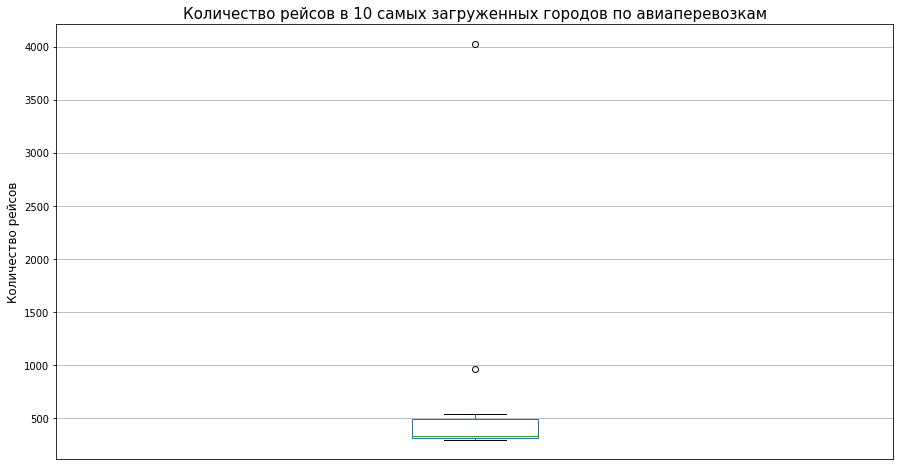

In [14]:
top_10_cities.boxplot(column='flights_per_month', figsize=(15, 8))
plt.title('Количество рейсов в 10 самых загруженных городов по авиаперевозкам', fontsize = 15)
plt.xticks([])
plt.ylabel('Количество рейсов', fontsize=12)
plt.show()

In [15]:
top_10_cities['flights_per_month'].describe()

count      10.000000
mean      776.900000
std      1158.775546
min       297.000000
25%       311.000000
50%       333.500000
75%       491.750000
max      4022.000000
Name: flights_per_month, dtype: float64

Сейчас на графике только 2 выброса - Москва и Санкт-Петербург.

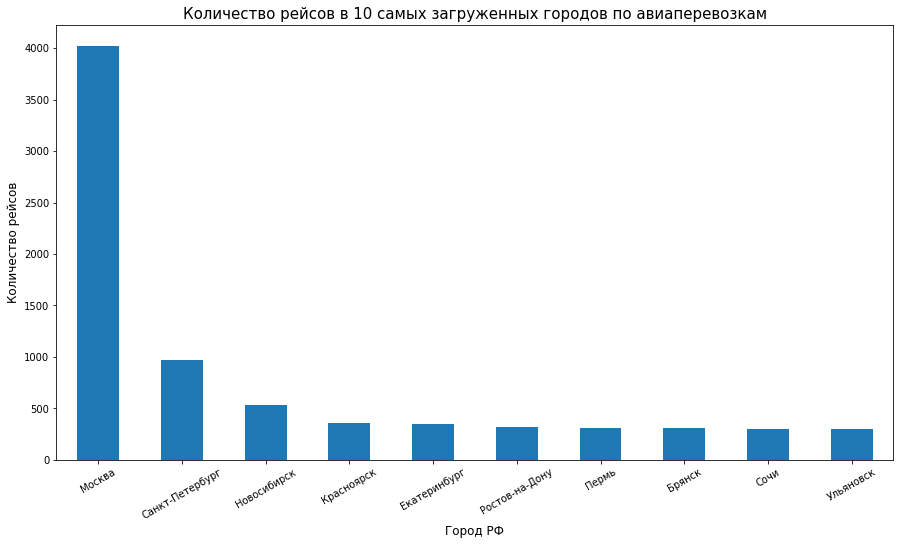

In [16]:
top_10_cities.sort_values('flights_per_month', ascending=False).plot(x='city', y='flights_per_month', kind='bar', figsize=(15, 8), rot=30, legend=False)
plt.title('Количество рейсов в 10 самых загруженных городов по авиаперевозкам', fontsize = 15)
plt.ylabel('Количество рейсов', fontsize=12)
plt.xlabel('Город РФ', fontsize=12)
plt.show()

### Вывод

Не считая трех самых крупных городов России, количество рейсов в оставшихся семи городах распределено более равномерно (от 297 - 351). В десятку попали как города-миллионеры, так и с меньшим количеством населения Брянск, Сочи, Ульяновск. Возможно, что все города из списка связывает то, что они являются транспортными узлами, из этих город пассажирам удобно добираться до населенных пунктов, в которых нет аэропорта или количество рейсов в них небольшое.

## 4. Общие выводы <a id="conclusion"></a>

В сентябре 2018 года самыми востребованными были модели самолетов с малой пассажировместимостью, которые используются для полетов на небольшие расстояния: Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Значительно меньше используются модели Airbus и Boeing, предназначенные для дальних полетов и больших пассажиропотоков.

Среди городов России пассажиры выбирают для авиаперелетов Москву - самый крупный деловой и туристический центр России, крупнейший транспортный узел страны. Количество рейсов в августе 2018 года превышает все рейсы в остальные топ-10 городов вместе взятые. Второе и третье место принадлежит Санкт-Петербургу и Новосибирску, которые также занимают соответствующие места по численности населения среди городов России. В десятку попали как города-миллионеры - Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, так и с меньшим количеством населения Брянск, Сочи, Ульяновск.